<a href="https://colab.research.google.com/github/monjjjjj/stockprice_prediction/blob/main/stockprice_prediction_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from google.colab import drive

In [40]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
training_set = pd.read_csv('/content/drive/MyDrive/StockPrice_prediction/Starbucks_Stock_2014_2018.csv')
training_set.head()

,Date,Open,High,Low,Close/Last,Volume
0,12/31/2018,63.77,64.61,63.66,64.40,7689617
1,12/28/2018,63.31,64.12,63.17,63.39,7711871
2,12/27/2018,62.62,63.24,61.62,63.20,11303400
3,12/26/2018,60.95,63.23,60.67,63.08,16457050
4,12/24/2018,61.48,61.82,60.42,60.56,6323252


In [10]:
#training_set = training_set.iloc[:, 1:2].values
#print(training_set)
#print(len(training_set))

In [42]:
training_set.set_index("Date", inplace = True)
training_set = training_set.iloc[::-1]
training_set = training_set[["High", "Low", "Open", "Volume", "Close/Last"]]
training_set.head()

,High,Low,Open,Volume,Close/Last
Date,,,,,
01/02/2014,39.14,38.50,39.04,8487286,38.59
01/03/2014,38.89,38.47,38.65,6540374,38.48
01/06/2014,38.68,38.01,38.45,10585410,38.09
01/07/2014,38.71,38.24,38.33,8162140,38.61
01/08/2014,39.07,38.60,38.64,10160490,39.02


In [ ]:
training_set = training_set.iloc[:, 1:2].values

scaler = MinMaxScaler()
training_set = scaler.fit_transform(training_set)

X_train = training_set[0:1257]
y_train = training_set[1:1258]
X_train = np.reshape(X_train, (1257, 1, 1))



In [14]:
model = Sequential()
model.add(LSTM(units = 100, activation = 'sigmoid', input_shape = (None, 1)))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, batch_size = 4, epochs = 100)


Epoch 1/100
315/315 [==============================] - 3s 5ms/step - loss: 0.0751
Epoch 2/100
315/315 [==============================] - 1s 5ms/step - loss: 0.0242
Epoch 3/100
315/315 [==============================] - 1s 4ms/step - loss: 0.0083
Epoch 4/100
315/315 [==============================] - 1s 5ms/step - loss: 0.0019
Epoch 5/100
315/315 [==============================] - 2s 7ms/step - loss: 6.5207e-04
Epoch 6/100
315/315 [==============================] - 3s 10ms/step - loss: 5.5039e-04
Epoch 7/100
315/315 [==============================] - 3s 8ms/step - loss: 5.5920e-04
Epoch 8/100
315/315 [==============================] - 1s 4ms/step - loss: 5.6068e-04
Epoch 9/100
315/315 [==============================] - 1s 4ms/step - loss: 5.7682e-04
Epoch 10/100
315/315 [==============================] - 1s 5ms/step - loss: 5.8533e-04
Epoch 11/100
315/315 [==============================] - 2s 5ms/step - loss: 5.8533e-04
Epoch 12/100
315/315 [==============================] - 2s 8ms/step

In [ ]:
test_set = pd.read_csv('/content/drive/MyDrive/StockPrice_prediction/Starbucks_Stock_2019_test.csv')
real_stock_price = test_set.iloc[:,1:2].values
inputs = real_stock_price
inputs = scaler.transform(inputs)
inputs = np.reshape(inputs, (7, 1, 1))
predicted_stock_price = model.predict(inputs)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

In [15]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100)               40800     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
None


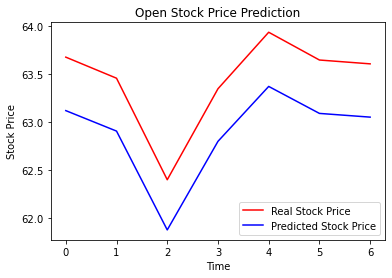

In [16]:
plt.plot(real_stock_price, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Open Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

40/40 [==============================] - 0s 2ms/step


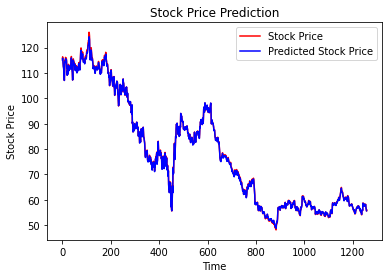

In [ ]:
# Making predictions for the entire dataset
# Getting the real stock price of 2017 - 2021
real_stock_price_train = pd.read_csv('/content/drive/MyDrive/StockPrice_prediction/Starbucks_Stock_2014_2018.csv')
real_stock_price_train = real_stock_price_train.iloc[:,1:2].values

# Getting the predicted stock price of 2017 - 2021
predicted_stock_price_train = model.predict(X_train)
predicted_stock_price_train = scaler.inverse_transform(predicted_stock_price_train)

# Visualising the results
plt.plot(real_stock_price_train, color = 'red', label = 'Stock Price')
plt.plot(predicted_stock_price_train, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))